# Getting the data

In [1]:
library(ggplot2)
library(flexmix)
library(reshape)
unzip('paravance-71-paravance-72_2018-06-29_1022596.zip', exdir = '/tmp/paravance_exp')

Loading required package: lattice


In [2]:
data = read.csv('/tmp/paravance_exp/exp/exp_Isend.csv', header=FALSE)
colnames(data) = c('op', 'msg_size', 'start', 'duration')
head(data)

op,msg_size,start,duration
MPI_Isend,765921,20.34943,7.4480e-06
MPI_Isend,765921,20.35128,7.7850e-06
MPI_Isend,765921,20.35355,7.5480e-06
MPI_Isend,765921,20.35586,7.4530e-06
MPI_Isend,765921,20.35818,8.3162e-05
MPI_Isend,765921,20.36047,7.0470e-06


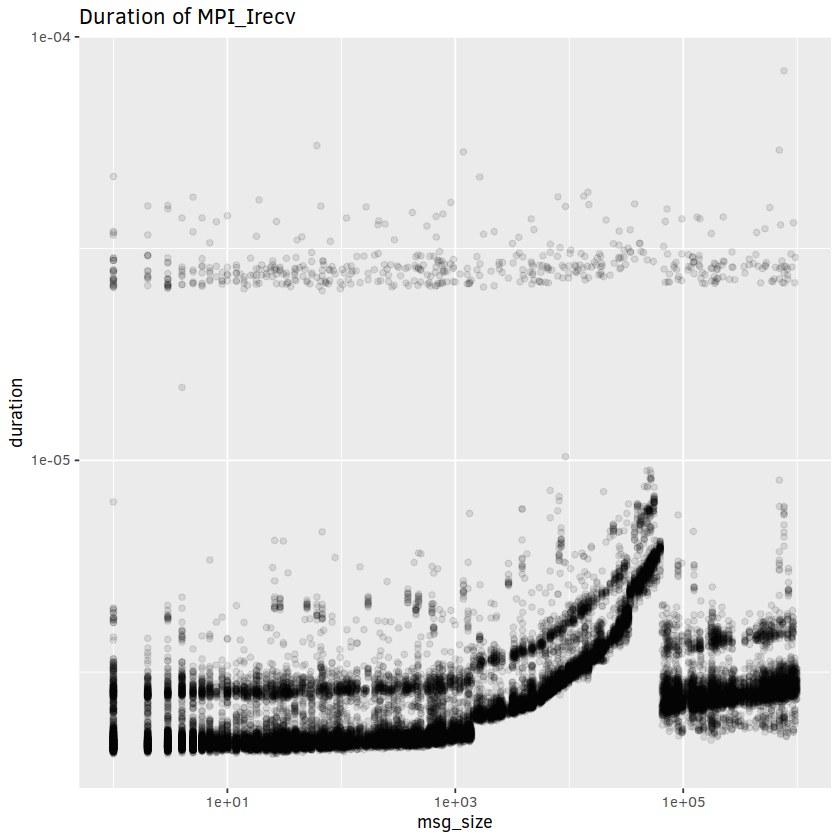

In [3]:
ggplot(data, aes(x=msg_size, y=duration)) + geom_point(alpha=0.1) + scale_x_log10() + scale_y_log10() + ggtitle('Duration of MPI_Irecv')

Let's restrict ourselves to one zone. For instance, let's take the small messages.

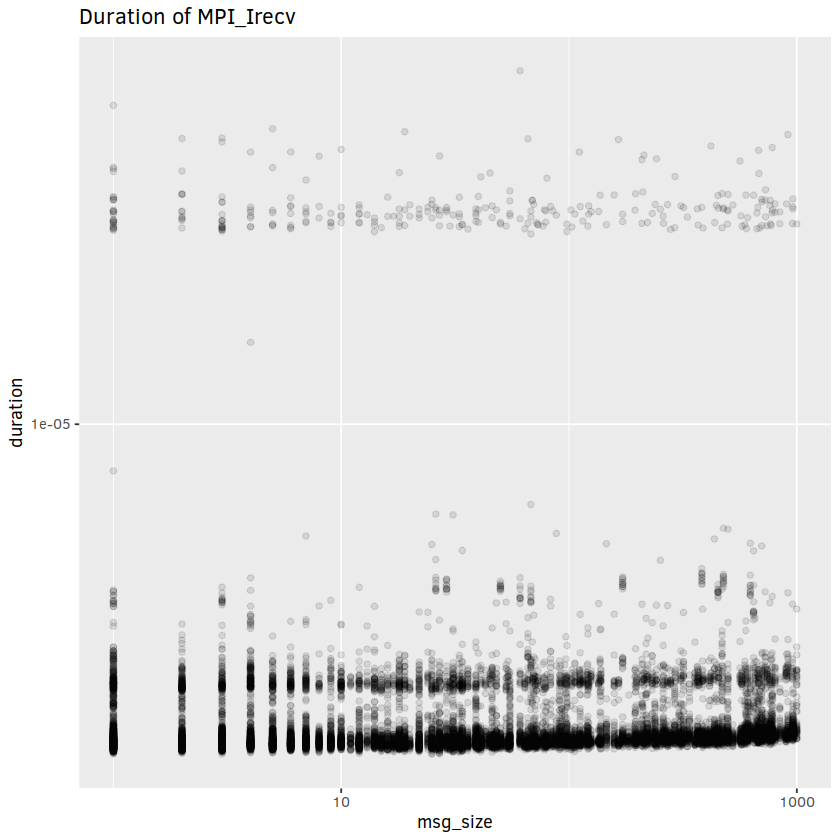

In [4]:
df = data[data$msg_size < 1000,]
ggplot(df, aes(x=msg_size, y=duration)) + geom_point(alpha=0.1) + scale_x_log10() + scale_y_log10() + ggtitle('Duration of MPI_Irecv')

# Finding automatically the right number of clusters: wrong

In [5]:
m1 = flexmix(data=df, duration~msg_size, k=8, control = list(minprior = 0.01))
m1
summary(m1)


Call:
flexmix(formula = duration ~ msg_size, data = df, k = 8, control = list(minprior = 0.01))

Cluster sizes:
    1     2     3     4     5     6     7 
  287   657 11332   238  1670   491  2625 

convergence after 29 iterations


Call:
flexmix(formula = duration ~ msg_size, data = df, k = 8, control = list(minprior = 0.01))

        prior  size post>0  ratio
Comp.1 0.0166   287    288 0.9965
Comp.2 0.0527   657  16855 0.0390
Comp.3 0.5980 11332  13581 0.8344
Comp.4 0.0154   238   6139 0.0388
Comp.5 0.0675  1670   2237 0.7465
Comp.6 0.0498   491  16855 0.0291
Comp.7 0.1999  2625  14240 0.1843

'log Lik.' 249737.2 (df=27)
AIC: -499420.4   BIC: -499210.9 


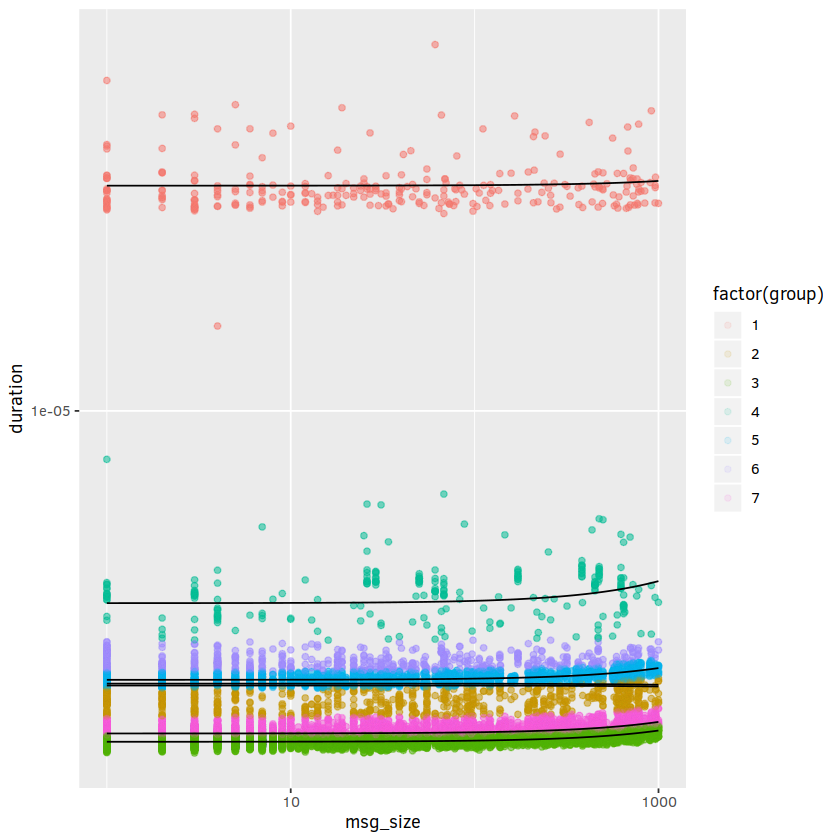

In [6]:
prediction = cbind(df[c('msg_size', 'duration')], fitted(m1))
prediction = melt(prediction, id=c('msg_size', 'duration'))
prediction$group = m1@cluster
ggplot(prediction, aes(x=msg_size, y=duration, color=factor(group))) + geom_point(alpha=0.1) +
    geom_line(aes(x=msg_size, y=value, group=variable), color='black') + scale_x_log10() + scale_y_log10()

# Finding automatically the right number of clusters: right?

In [7]:
ex2 <- initFlexmix(duration~msg_size, data=df, k = 1:8, 
                   control = list(minprior = 0), nrep = 2)
ex2

1 : * *
2 : * *
3 : * *
4 : * *
5 : * *
6 : * *
7 : * *
8 : * *
* * * * * * * * 



Call:
initFlexmix(duration ~ msg_size, data = df, k = 1:8, control = list(minprior = 0), 
    nrep = 2)

  iter converged k k0   logLik       AIC       BIC       ICL
1    2      TRUE 1  1 193115.6 -386225.2 -386201.9 -386201.9
2    4      TRUE 2  2 232884.1 -465754.2 -465699.9 -465538.5
3    6      TRUE 3  3 247848.5 -495675.0 -495589.6 -494683.7
4   51      TRUE 4  4 248738.3 -497446.6 -497330.2 -492594.4
5   34      TRUE 5  5 248938.7 -497839.5 -497692.1 -495204.1
6   25      TRUE 6  6 249675.0 -499304.0 -499125.6 -493321.9
7   30      TRUE 7  7 249762.7 -499471.3 -499261.8 -491654.8
8   70      TRUE 8  8 249887.9 -499713.9 -499473.4 -485702.0

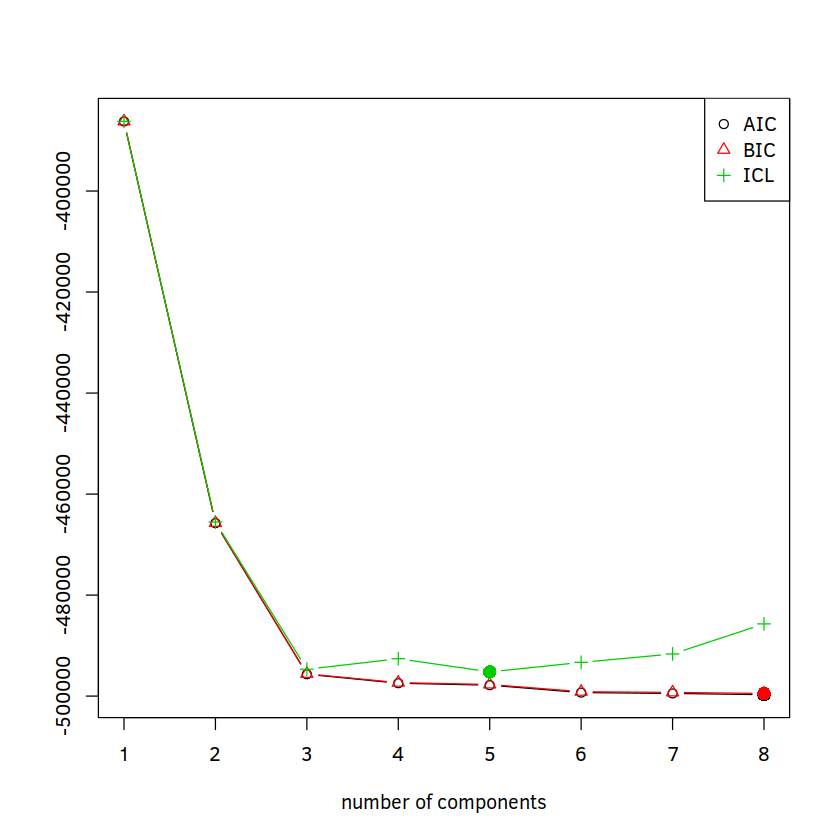

In [8]:
plot(ex2)

In [9]:
getModel(ex2, which = "ICL")


Call:
initFlexmix(duration ~ msg_size, data = df, k = 5, control = list(minprior = 0), 
    nrep = 2)

Cluster sizes:
    1     2     3     4     5 
  235  1564 13408  1806   287 

convergence after 34 iterations

In [10]:
getModel(ex2, which = "BIC")


Call:
initFlexmix(duration ~ msg_size, data = df, k = 8, control = list(minprior = 0), 
    nrep = 2)

Cluster sizes:
   1    2    3    4    5    6    7    8 
7091  243  599 4528 1443 2154  955  287 

convergence after 70 iterations

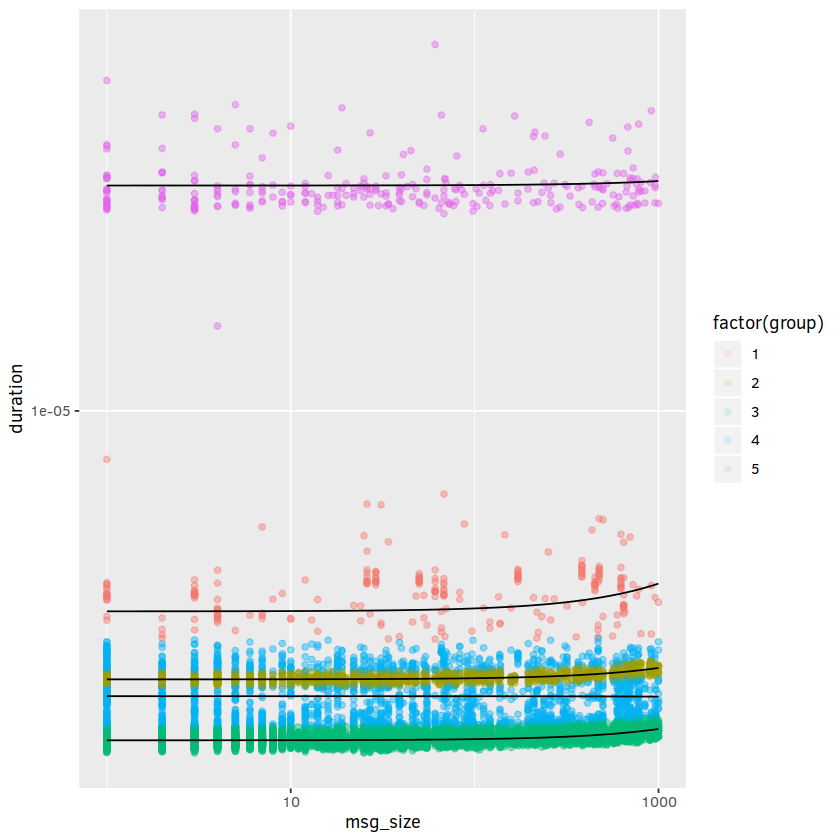

In [11]:
model = getModel(ex2, which = "ICL")
prediction = cbind(df[c('msg_size', 'duration')], fitted(model))
prediction = melt(prediction, id=c('msg_size', 'duration'))
prediction$group = model@cluster
ggplot(prediction, aes(x=msg_size, y=duration, color=factor(group))) + geom_point(alpha=0.1) +
    geom_line(aes(x=msg_size, y=value, group=variable), color='black') + scale_x_log10() + scale_y_log10()

## Another zone

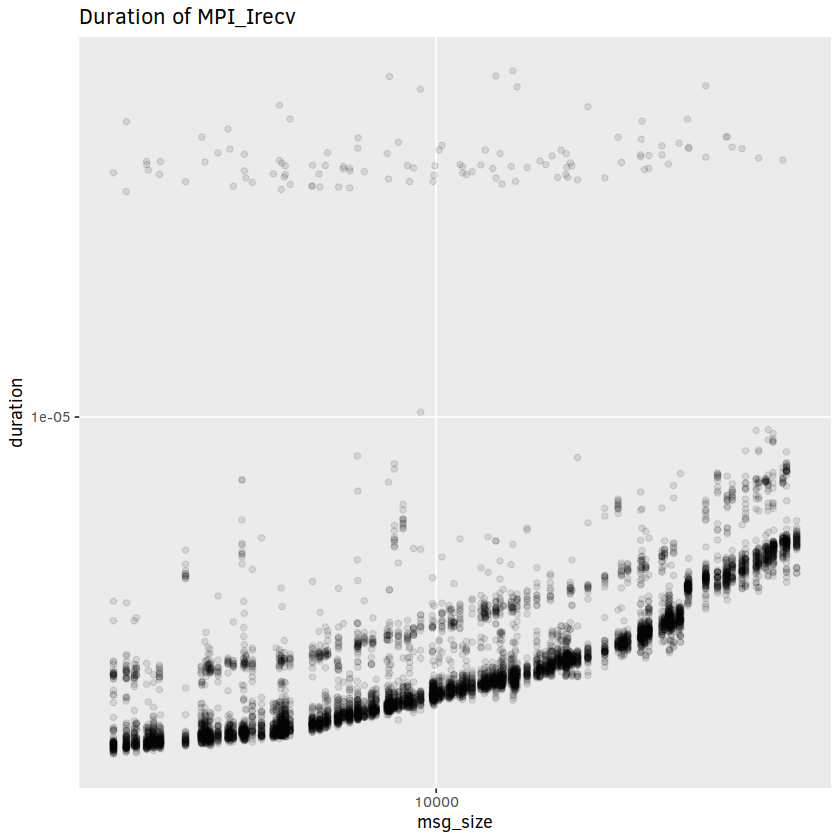

In [12]:
df = data[data$msg_size > 2000 & data$msg_size < 60000,]
ggplot(df, aes(x=msg_size, y=duration)) + geom_point(alpha=0.1) + scale_x_log10() + scale_y_log10() + ggtitle('Duration of MPI_Irecv')

In [13]:
ex2 <- initFlexmix(duration~msg_size, data=df, k = 1:8, 
                   control = list(minprior = 0), nrep = 2)
ex2

1 : * *
2 : * *
3 : * *
4 : * *
5 : * *
6 : * *
7 : * *
8 : * *
* * * * * * * * 



Call:
initFlexmix(duration ~ msg_size, data = df, k = 1:8, control = list(minprior = 0), 
    nrep = 2)

  iter converged k k0   logLik       AIC       BIC       ICL
1    2      TRUE 1  1  88704.7 -177403.4 -177382.5 -177382.5
2   11      TRUE 2  2 105502.6 -210991.1 -210942.3 -210702.9
3   13      TRUE 3  3 108223.4 -216424.8 -216348.1 -215470.7
4   19      TRUE 4  4 108673.6 -217317.3 -217212.7 -212461.8
5   30      TRUE 5  5 108964.6 -217891.1 -217758.6 -212284.7
6   35      TRUE 6  6 109251.1 -218456.1 -218295.7 -213373.3
7   32      TRUE 7  7 109220.5 -218387.1 -218198.7 -210485.7
8   67      TRUE 8  8 109662.9 -219263.8 -219047.6 -210002.4

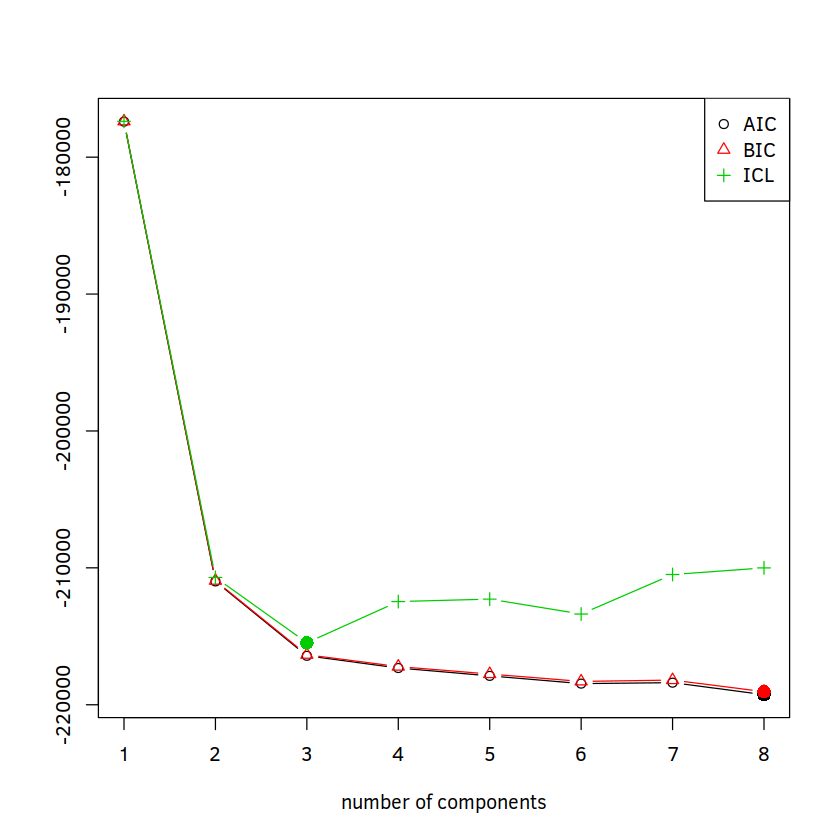

In [14]:
plot(ex2)

In [15]:
model = getModel(ex2, which = "ICL")
model


Call:
initFlexmix(duration ~ msg_size, data = df, k = 3, control = list(minprior = 0), 
    nrep = 2)

Cluster sizes:
   1    2    3 
1613  126 6161 

convergence after 13 iterations

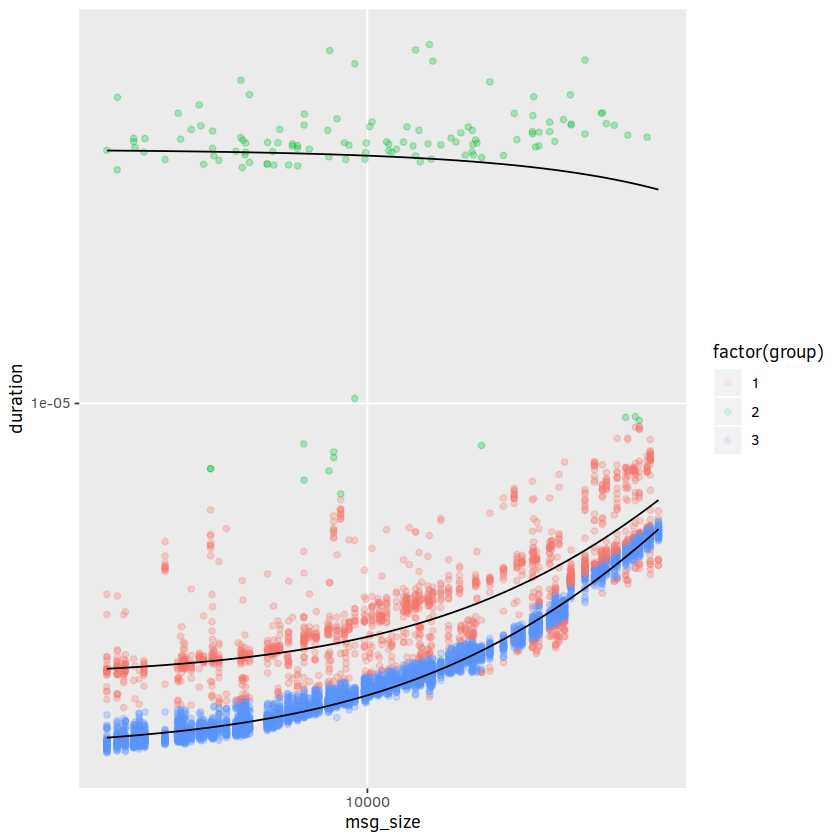

In [16]:
prediction = cbind(df[c('msg_size', 'duration')], fitted(model))
prediction = melt(prediction, id=c('msg_size', 'duration'))
prediction$group = model@cluster
ggplot(prediction, aes(x=msg_size, y=duration, color=factor(group))) + geom_point(alpha=0.1) +
    geom_line(aes(x=msg_size, y=value, group=variable), color='black') + scale_x_log10() + scale_y_log10()

Wow, WTF ?!